In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

from analysis import *

plt.rcParams["figure.dpi"] = 300

In [2]:
# design momentum
P0C = 43.4e6

# diagnostic dipole locations
b5_entry = 0.3
b5_exit = 0.3 + 0.3

diag_dip_loc = [b5_entry, b5_exit]

In [3]:
# stats lims
sigma_lims= (0, 5)
epsilon_lims = (0, 100)

3.1580965341300975e-05


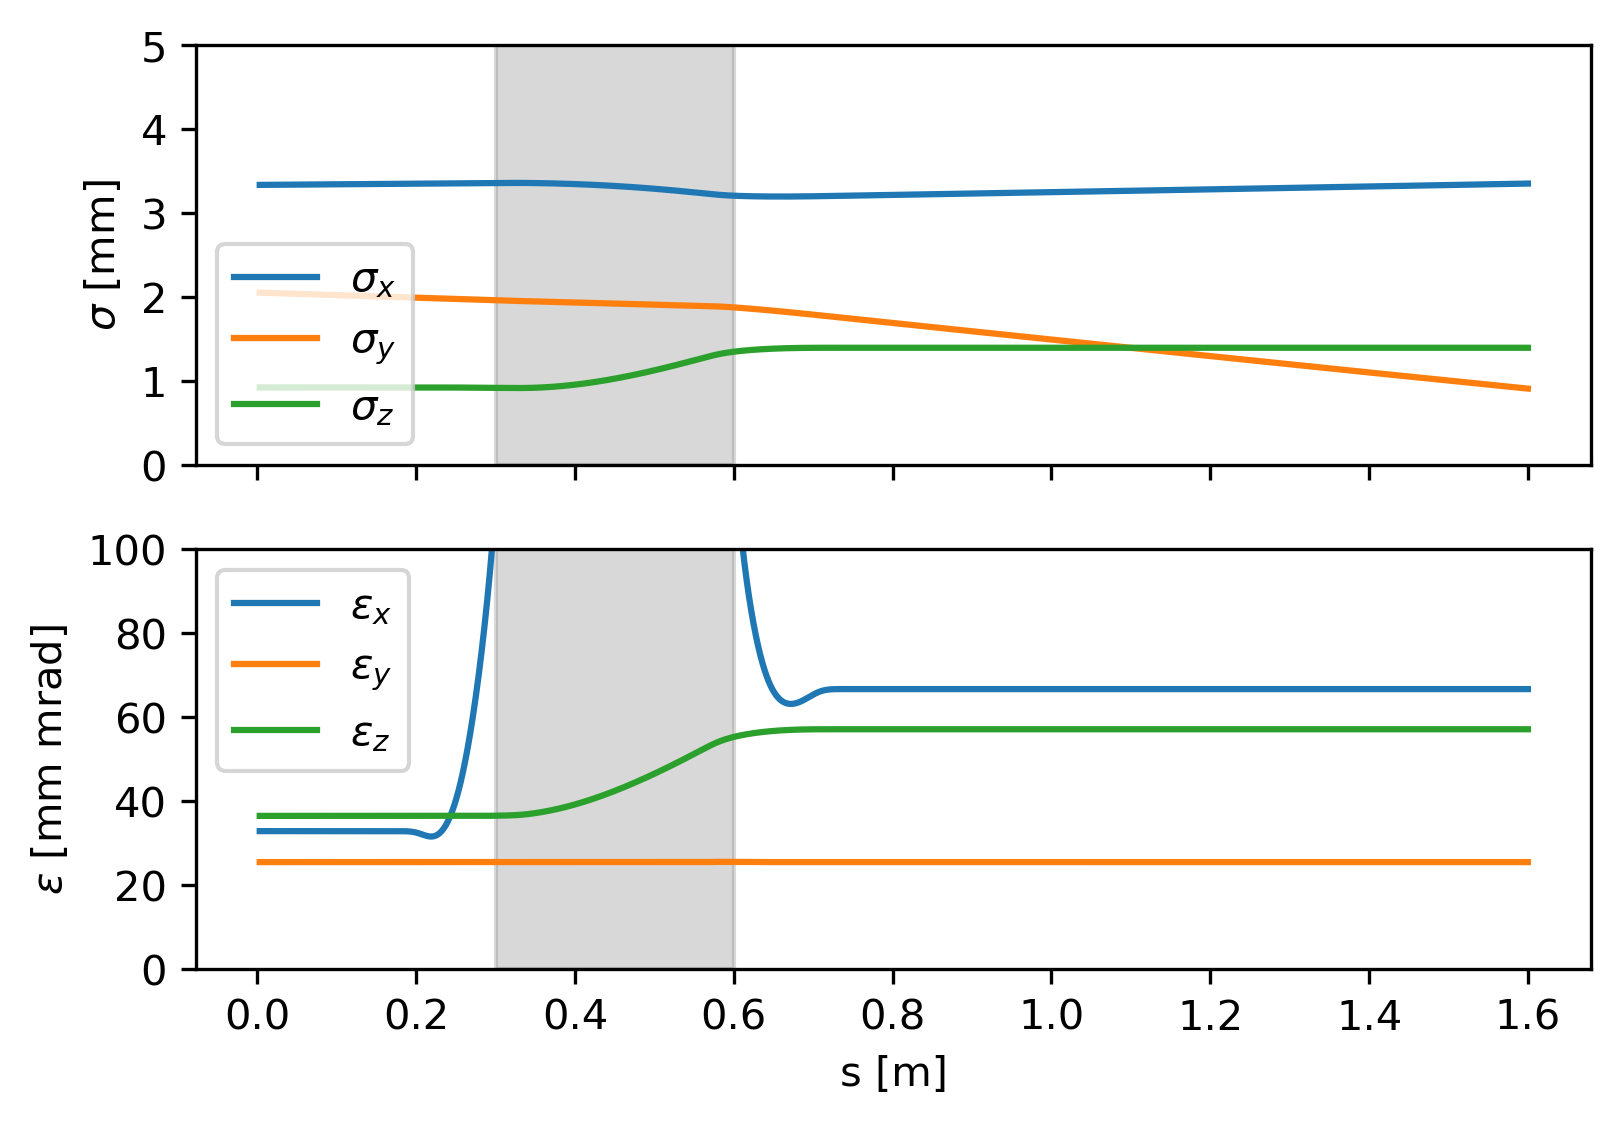

In [4]:
# dogleg csr off

csr_off_h5 = h5py.File('OPAL/diagnostics_1e5par_1nc_csroff_3mm_p1mrad_p1mrad.h5', 'r')
csr_off_stats = get_stats(csr_off_h5)
fig, ax = plot_stats(csr_off_stats, sigma_lims, epsilon_lims, diag_dip_loc)
plt.show()
csr_off = last_step(csr_off_h5)
csr_off_par = opal_step_to_bmadx_particle(csr_off, P0C)

3.1580965341295554e-05


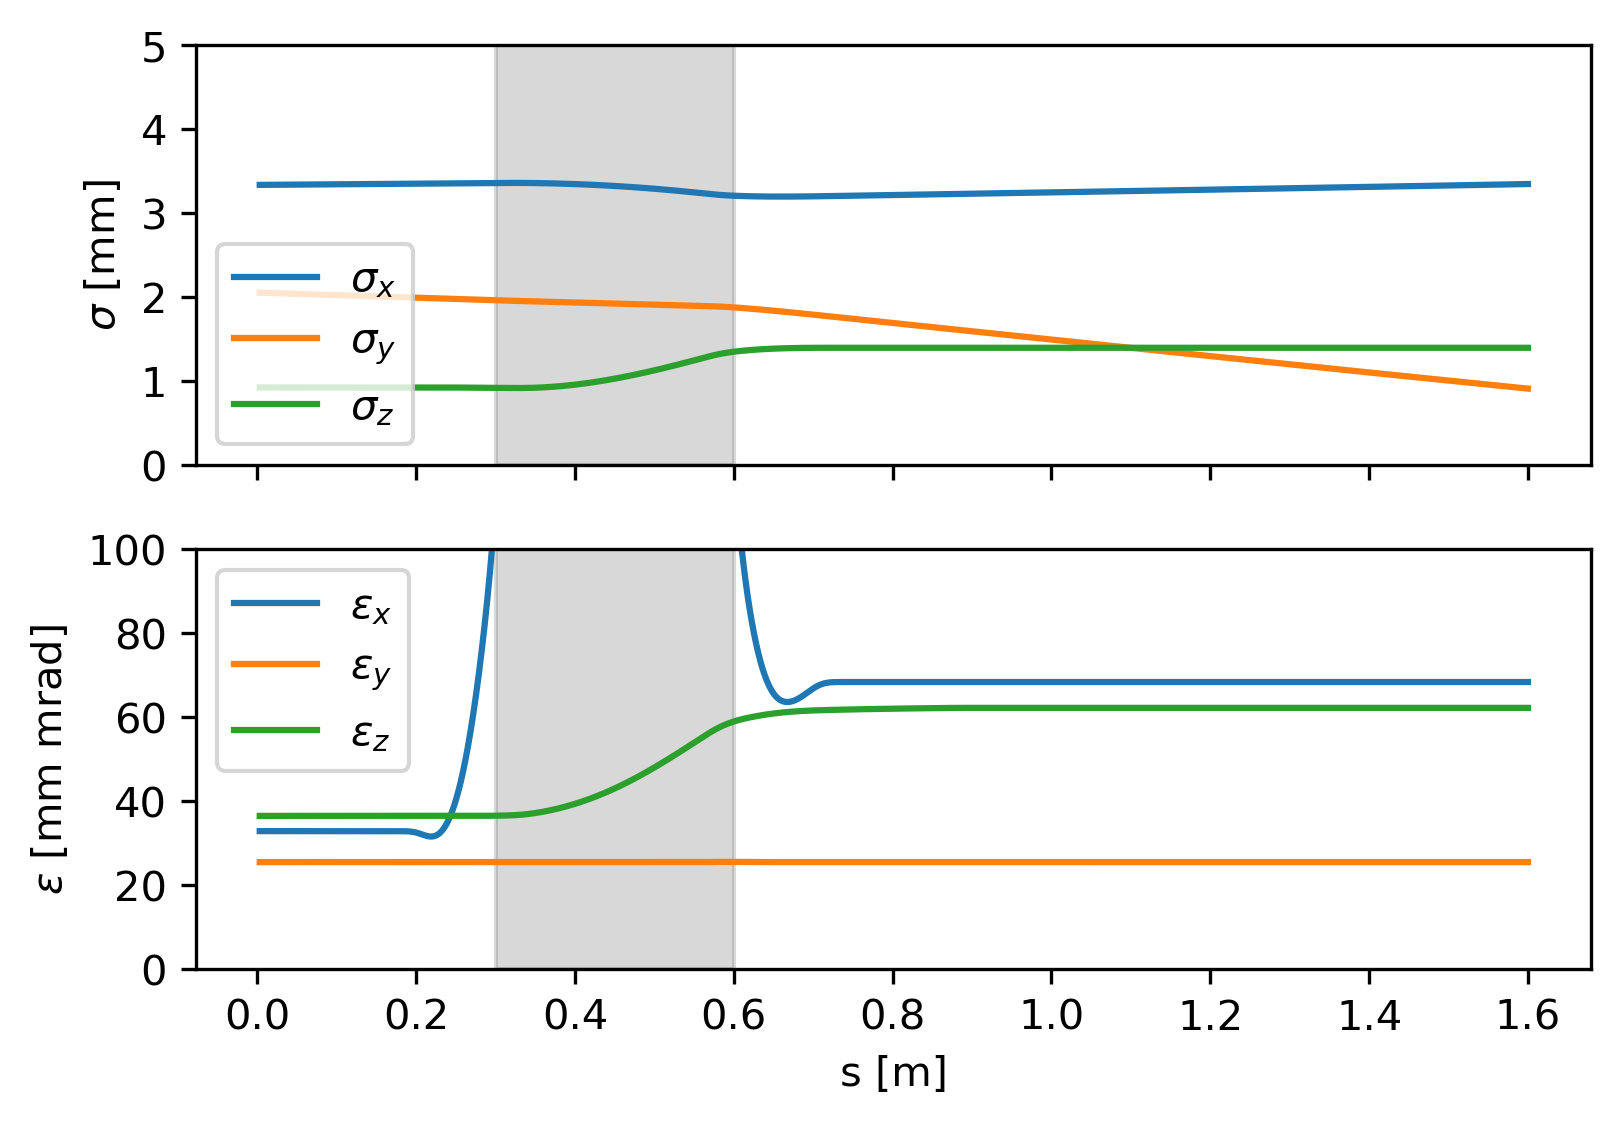

In [5]:
# dogleg csr on
csr_1nc_h5 = h5py.File('OPAL/diagnostics_1e5par_1nc_csron_3mm_p1mrad_p1mrad.h5', 'r')
csr_1nc_stats = get_stats(csr_1nc_h5)
fig, ax = plot_stats(csr_1nc_stats, sigma_lims, epsilon_lims, diag_dip_loc)
plt.show()
csr_1nc = last_step(csr_1nc_h5)
csr_1nc_par = opal_step_to_bmadx_particle(csr_1nc, P0C)

In [6]:
# initial beam in bmadx coords
initial = first_step(csr_1nc_h5)
initial_par = opal_step_to_bmadx_particle(initial, P0C)  # initial particle

In [7]:
csr_1nc_par.p0c

43400000.0

In [8]:
# plots lims
z_lims = (-5, 5)
pz_lims = (-0.2, 0.10)
x_lims = (-15, 15)
px_lims= (-0.4, 1.1)

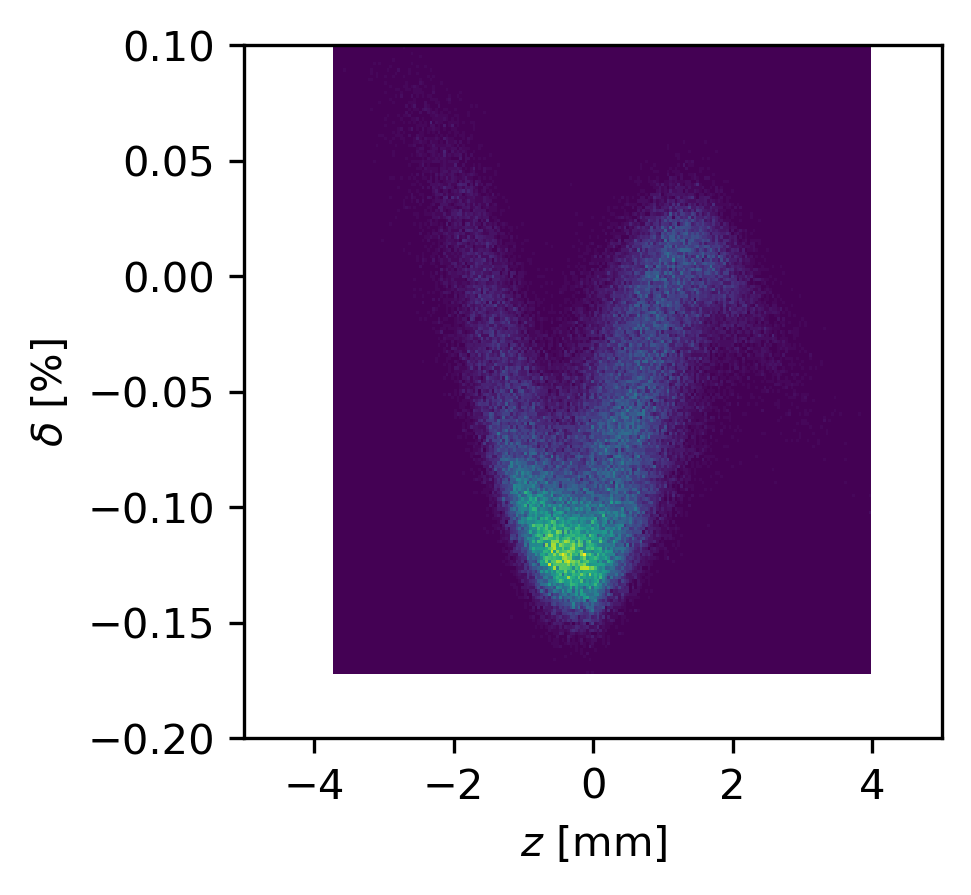

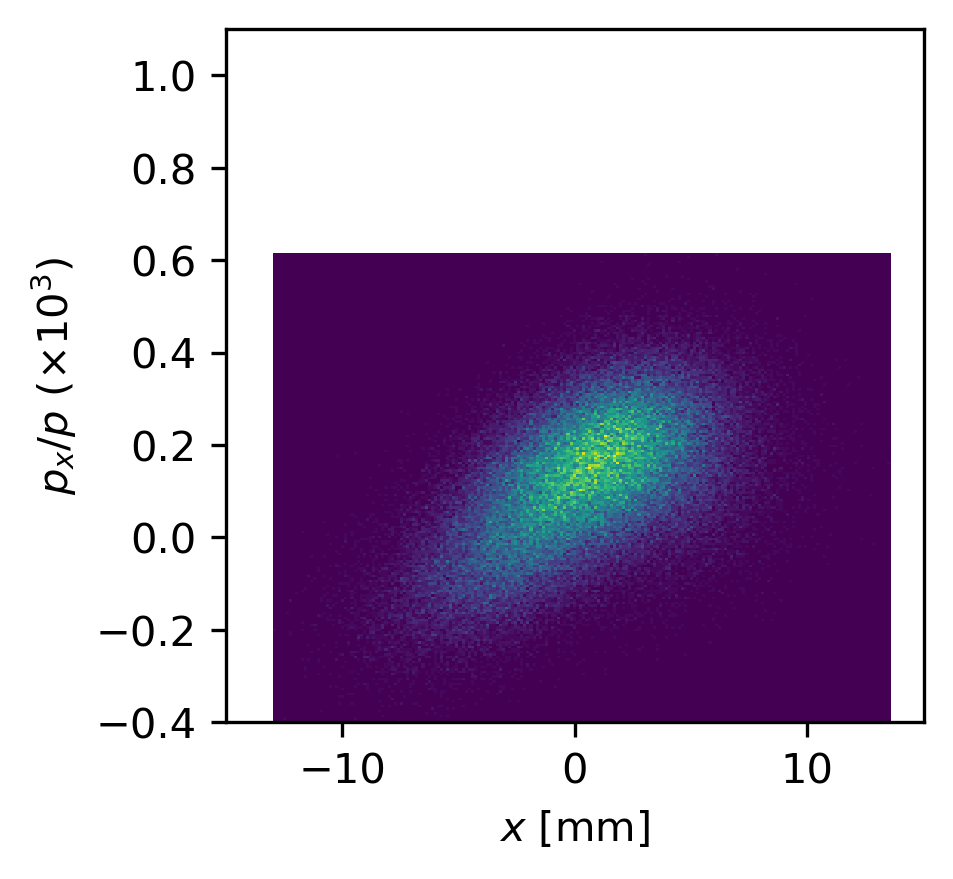

In [9]:
# plot initial beam long and hor phase space
fig, ax = plot_zpz(initial_par.z, initial_par.pz, z_lims, pz_lims)
plt.show()
fig, ax = plot_xpx(initial_par.x, initial_par.px, x_lims, px_lims)
plt.show()

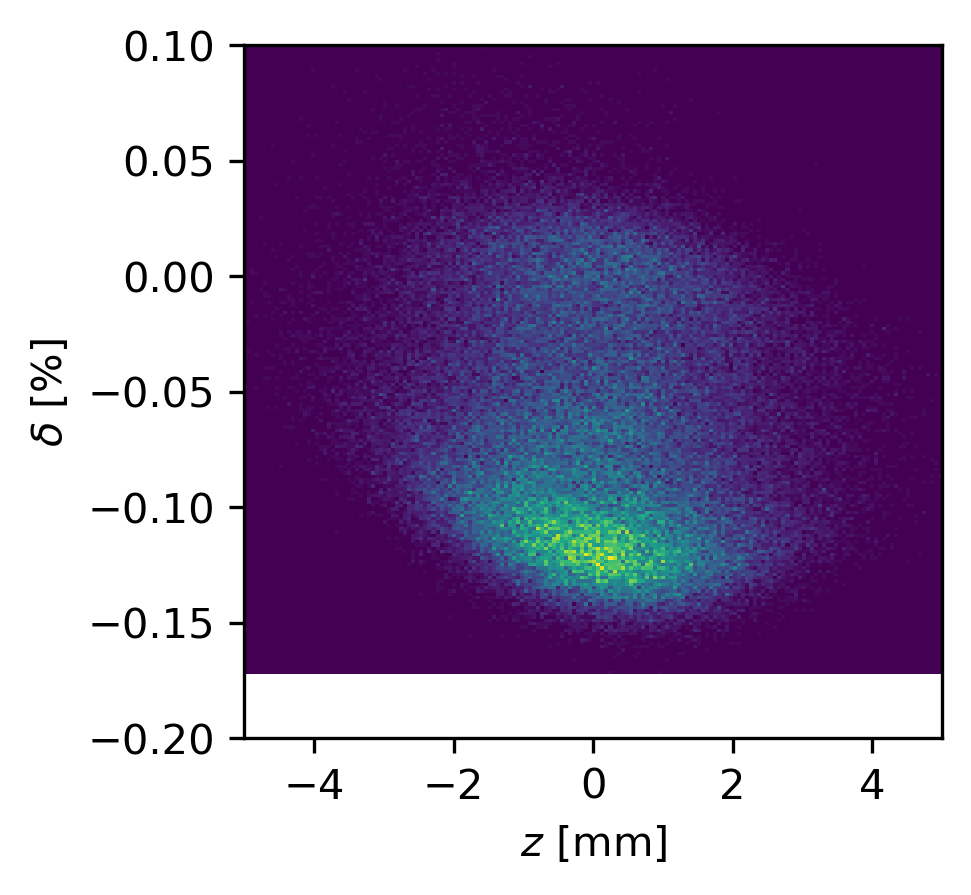

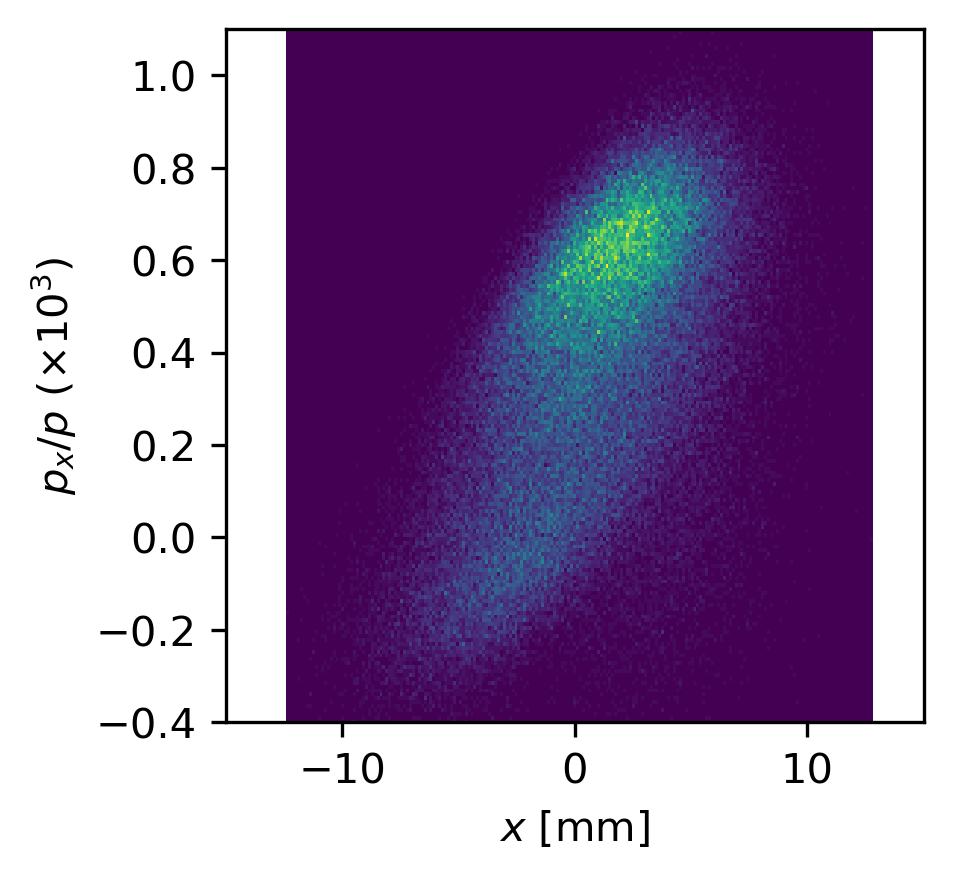

In [10]:
# plot final beam CSR off
# plot initial beam long and hor phase space
fig, ax = plot_zpz(csr_off_par.z, csr_off_par.pz, z_lims, pz_lims)
plt.show()
fig, ax = plot_xpx(csr_off_par.x, csr_off_par.px, x_lims, px_lims)
plt.show()

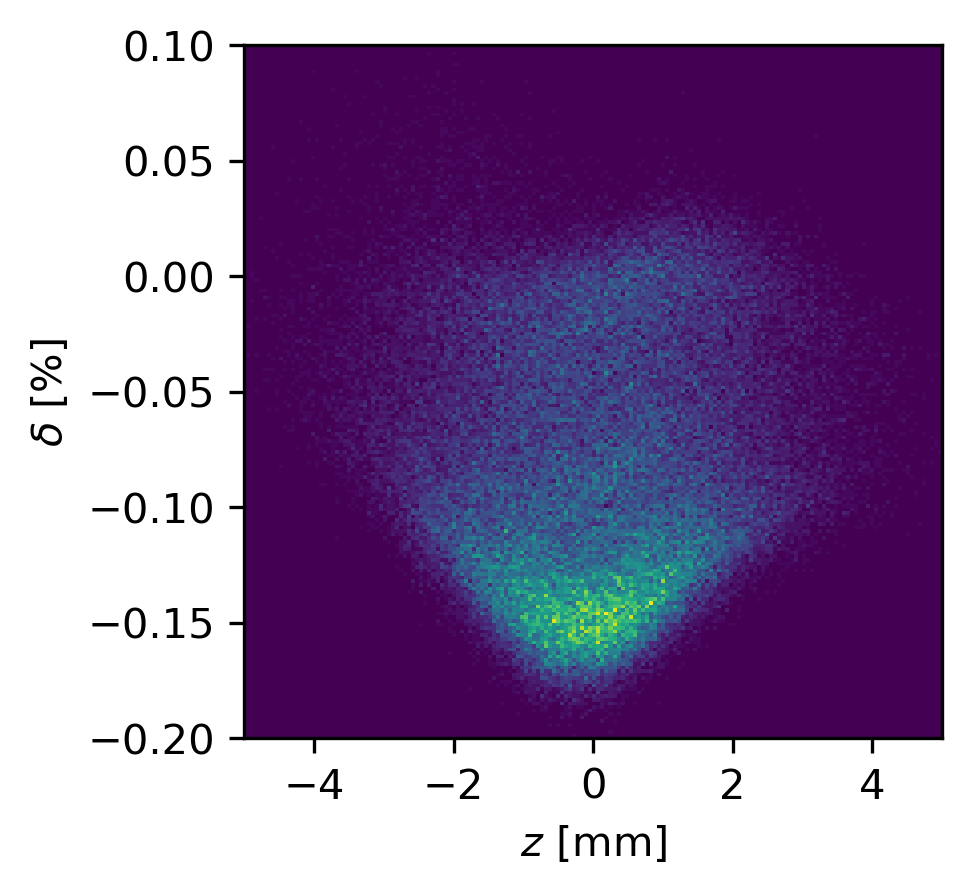

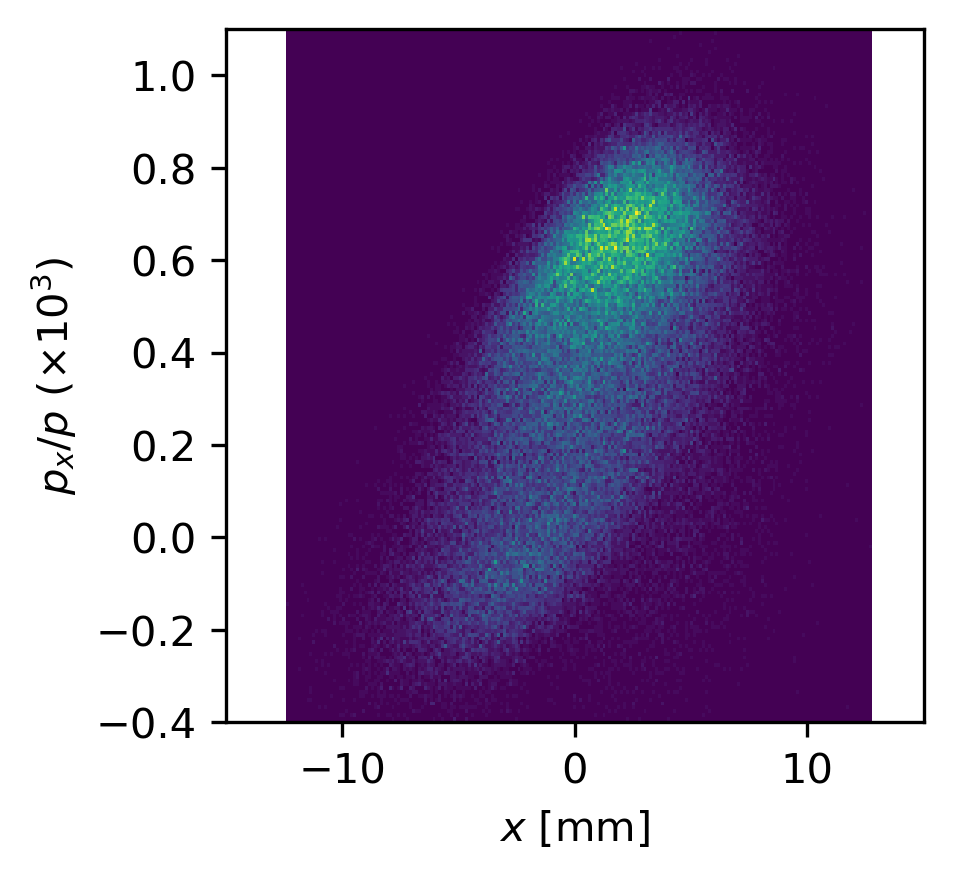

In [11]:
# plot final beam CSR on
fig, ax = plot_zpz(csr_1nc_par.z, csr_1nc_par.pz, z_lims, pz_lims)
plt.show()
fig, ax = plot_xpx(csr_1nc_par.x, csr_1nc_par.px, x_lims, px_lims)
plt.show()

In [12]:
# slicing params
n_slices = 11
z_min = csr_1nc_par.z.mean() - 2*csr_1nc_par.z.std()
z_max = csr_1nc_par.z.mean() + 2*csr_1nc_par.z.std()
z_slices = np.linspace(z_min, z_max, n_slices+1)

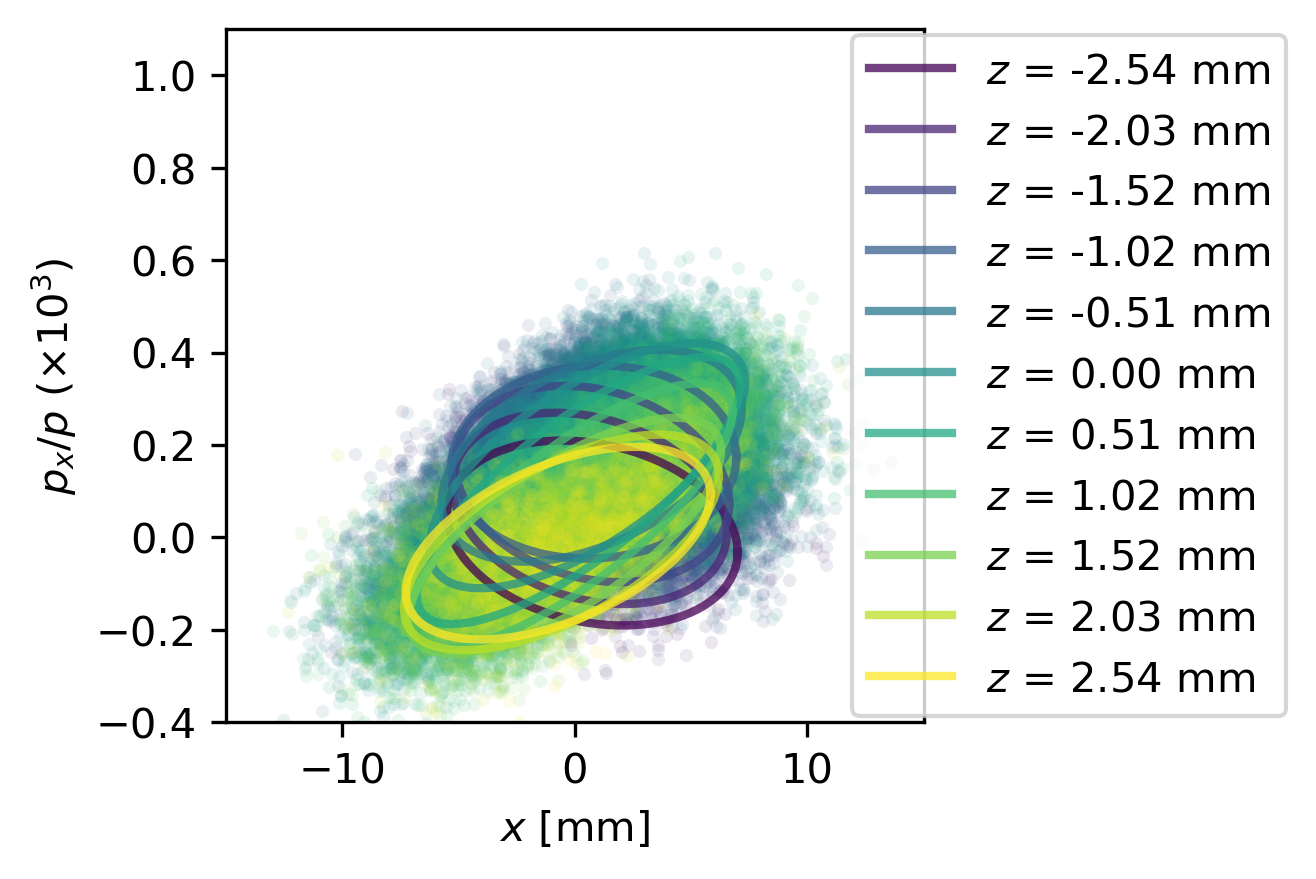

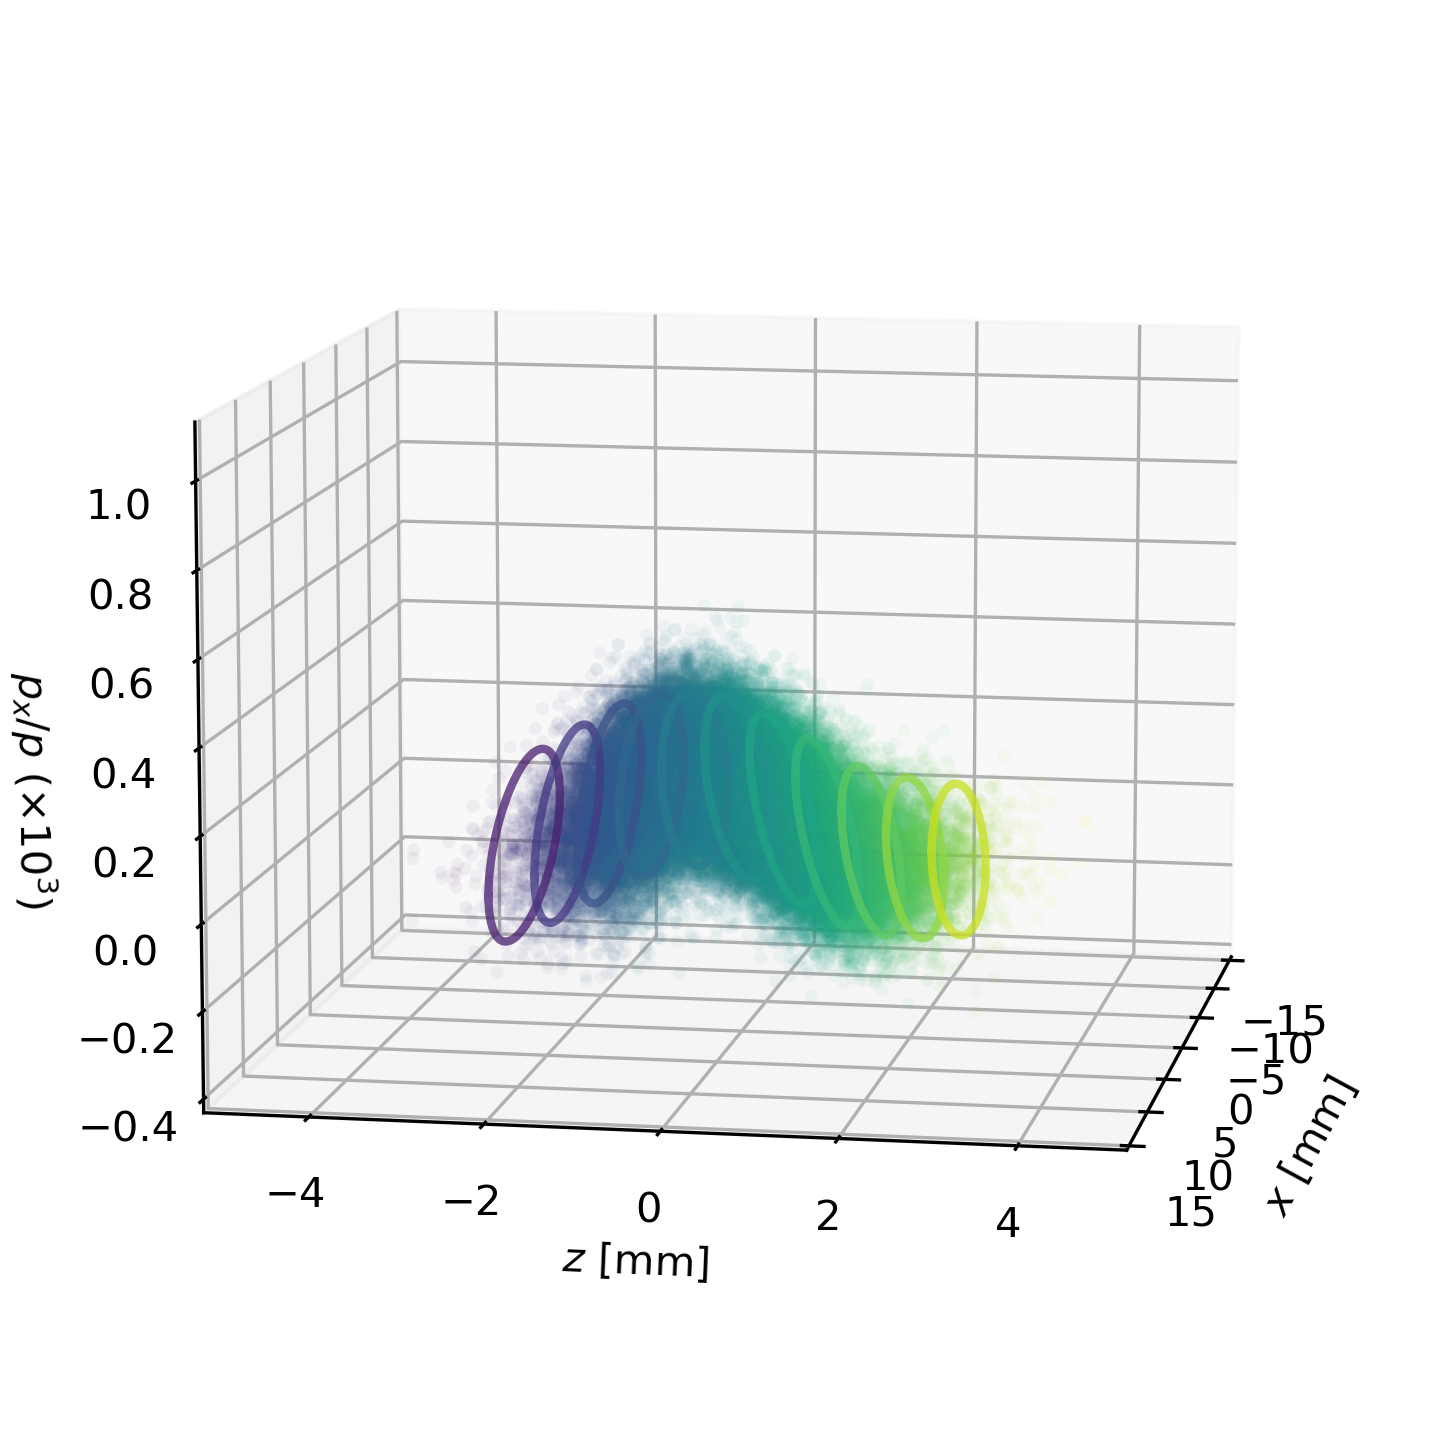

In [13]:
# plot initial beam sliced phase space
fig, ax = plot_sliced_ps_2d(initial_par, z_slices, 'z', x_lim=x_lims, px_lim=px_lims)
plt.show()
fig, ax = plot_sliced_ps_3d(initial_par, z_slices, 'z', x_lim=x_lims, px_lim=px_lims, z_lim=z_lims)
plt.show()


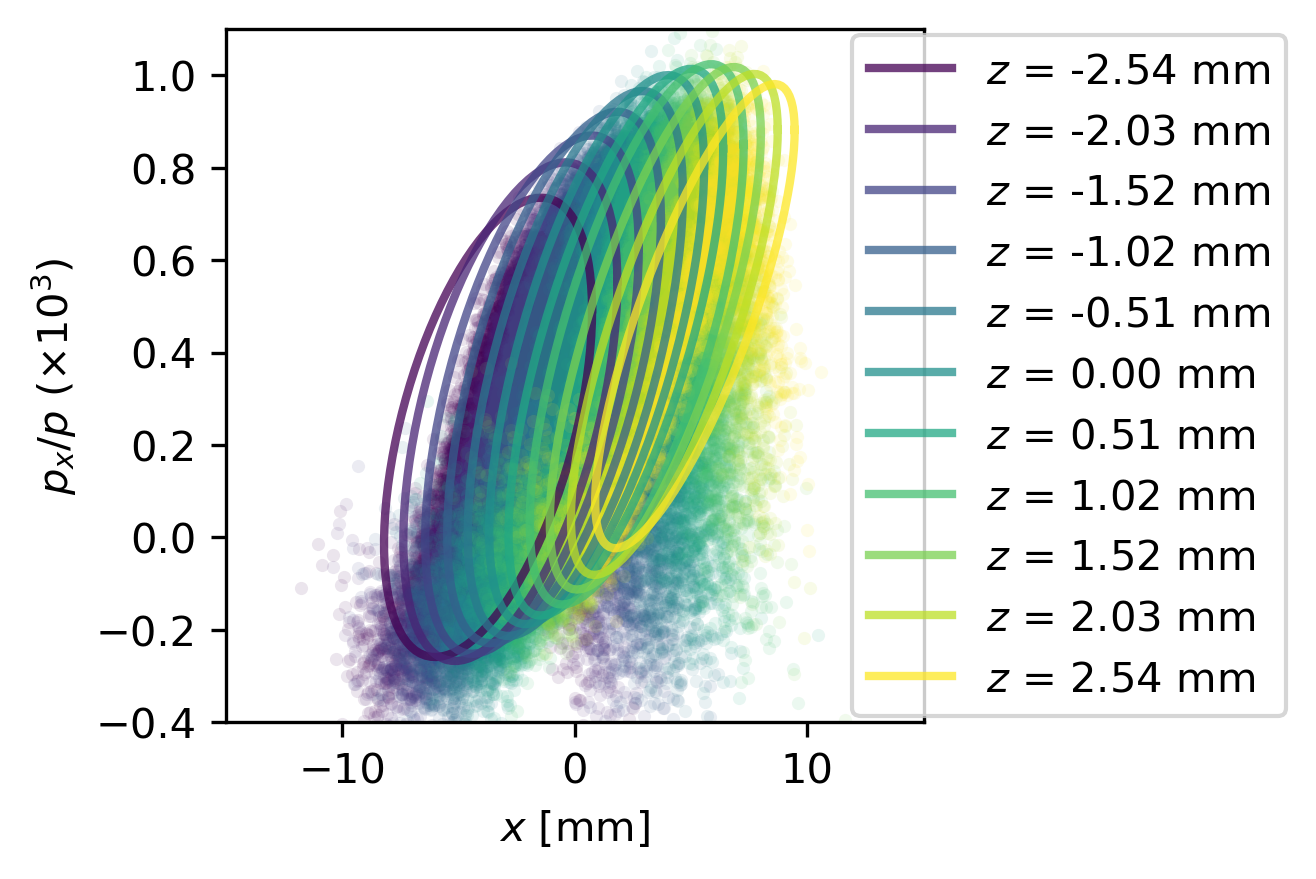

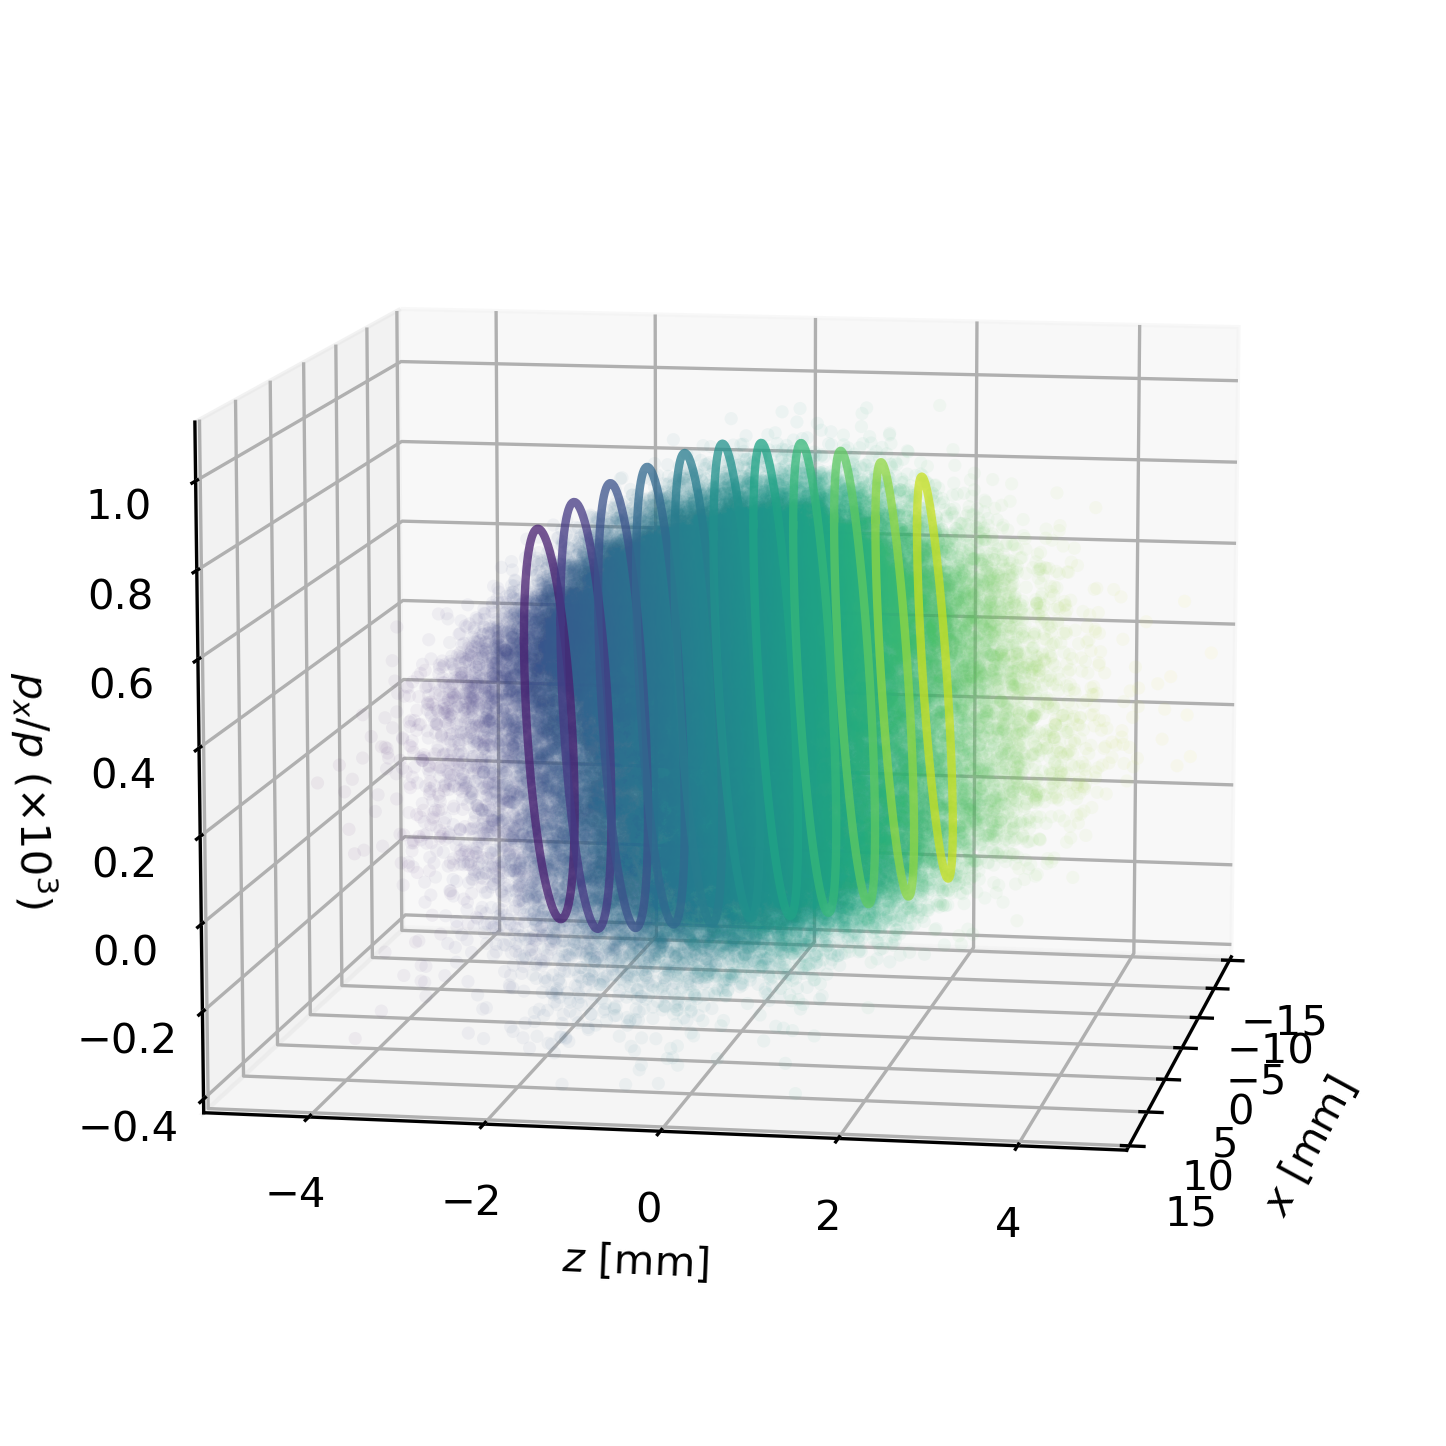

In [14]:
# plot final beam sliced phase space with CSR off
fig, ax = plot_sliced_ps_2d(csr_off_par, z_slices,  'z', x_lim=x_lims, px_lim=px_lims)
plt.show()
fig, ax = plot_sliced_ps_3d(csr_off_par, z_slices,  'z', x_lim=x_lims, px_lim=px_lims, z_lim=z_lims)
plt.show()

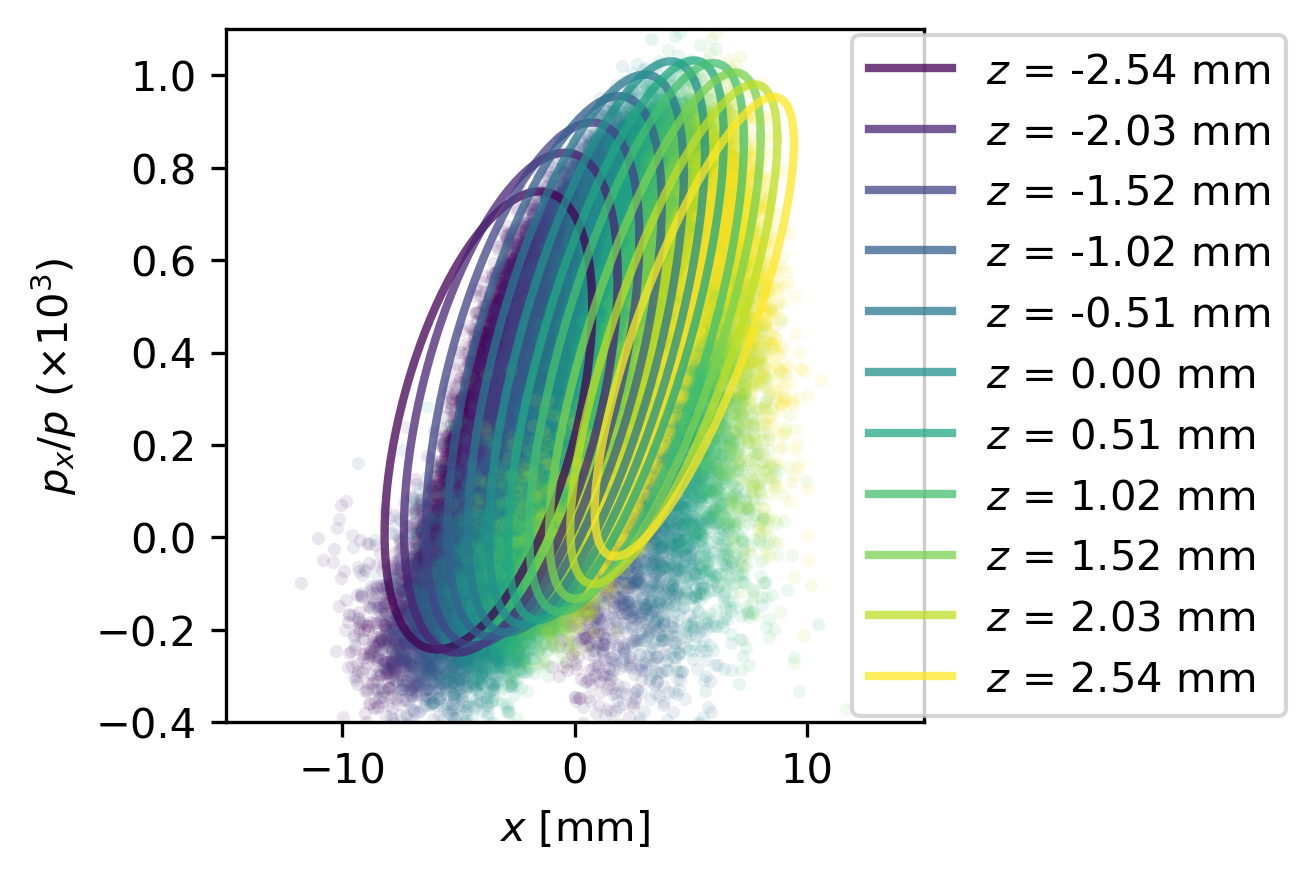

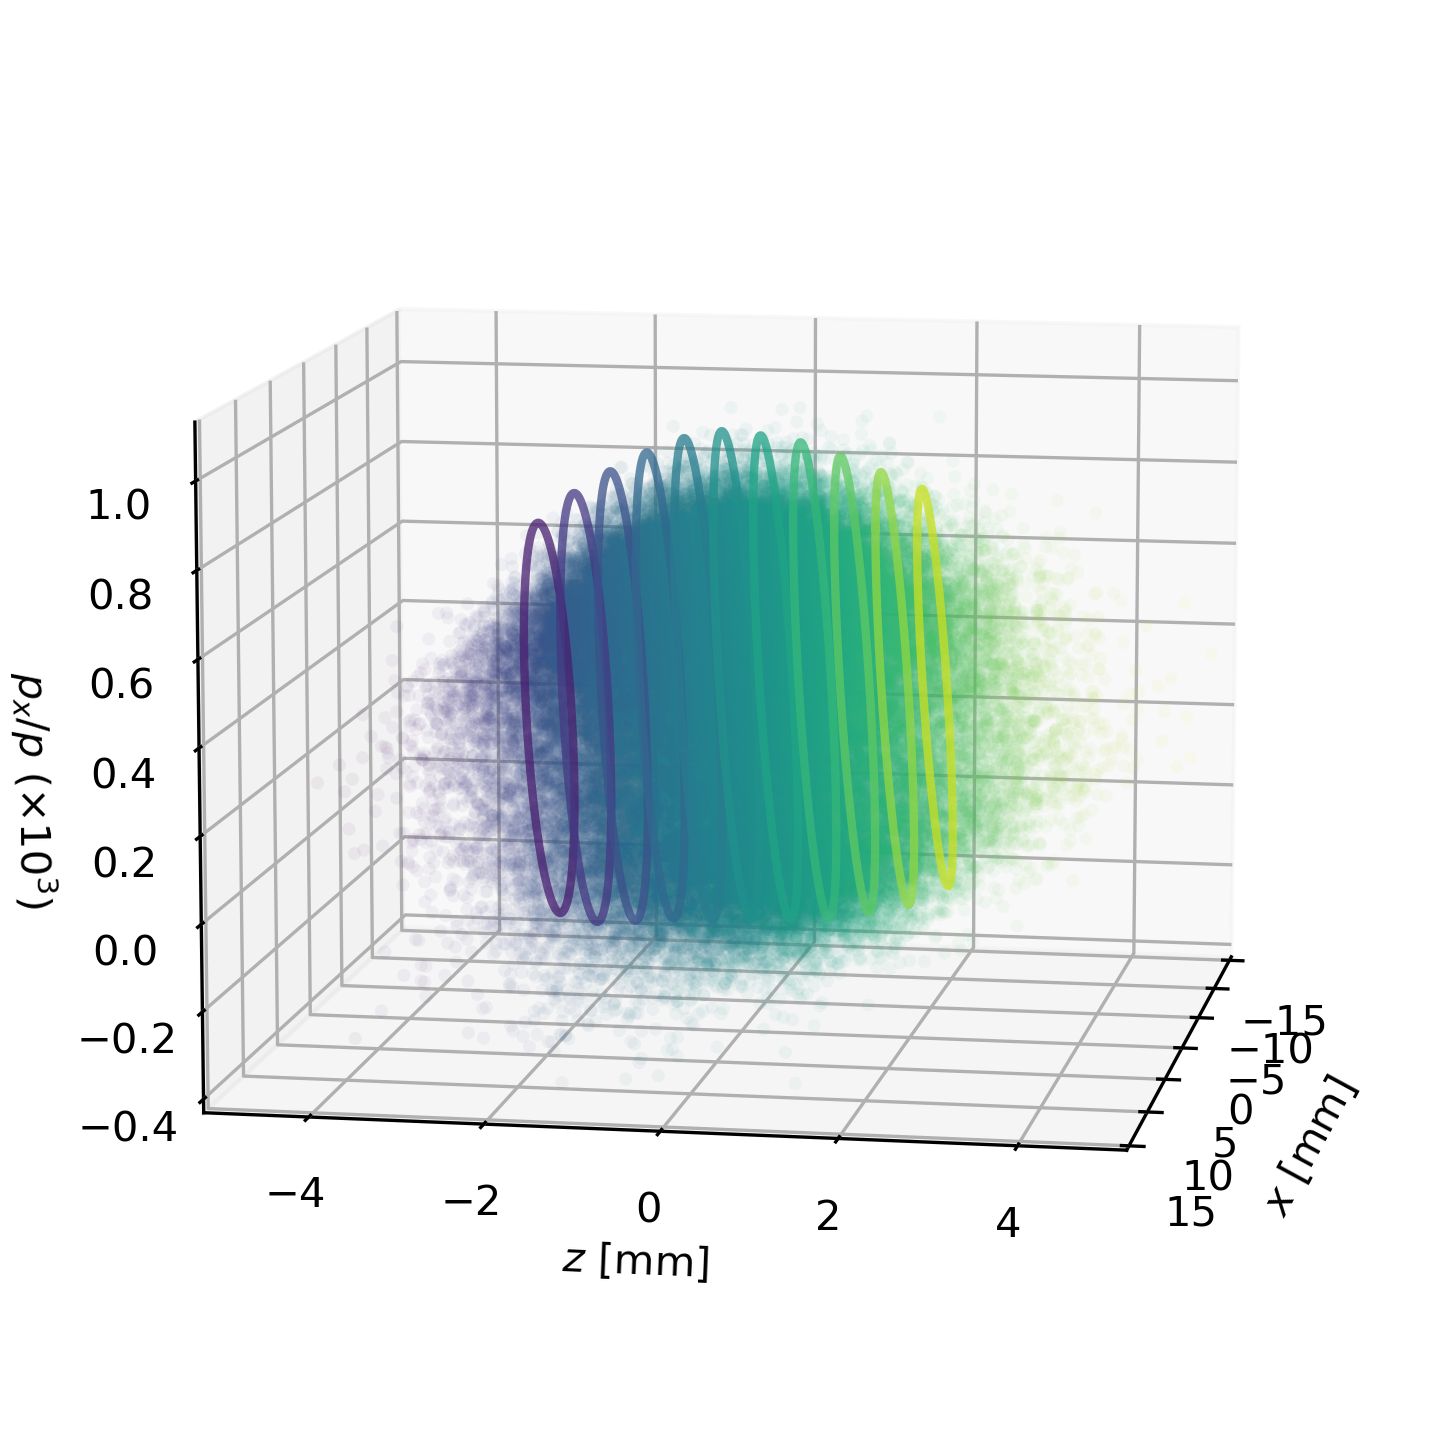

In [15]:
# plot final beam sliced phase space with CSR on
fig, ax = plot_sliced_ps_2d(csr_1nc_par, z_slices, 'z', x_lim=x_lims, px_lim=px_lims)
plt.show()
fig, ax = plot_sliced_ps_3d(csr_1nc_par, z_slices, 'z', x_lim=x_lims, px_lim=px_lims, z_lim=z_lims)
plt.show()

In [16]:
# save phase space after dogleg (just before diagnostics dipole)
# save_opal_last_beam(csr_1nc_h5, 'OPAL/dogleg_beam_1e5_3mm_p1mrad_p1mrad.data')

# save bmadx particle
#import pickle
#with open('OPAL/dogleg_beam_1e4_3mm_p1mrad_p1mrad.pkl', 'wb') as f:
#    pickle.dump(csr_1nc_par, f)

In [24]:
from bmadx import SBend, Drift, PI

p_design = P0C
# Bend parameters
# fixed: 
l_bend = 0.3
theta = 20.0 * PI / 180.0
l_arc = l_bend * theta / np.sin(theta)
g = theta / l_arc 

bend = SBend(
    L = l_arc,
    P0C = p_design,
    G = g,
    E1 = 0.0,
    E2 = theta,
    FRINGE_AT = "no_end"
)

d1 = Drift(L=0.3)
d2 = Drift(L=1.0)

In [26]:
csr_1nc_par

Particle(x=array([ 0.00050817, -0.00102196,  0.00041675, ...,  0.00467405,
        0.00683841,  0.00183612]), px=array([6.21509989e-04, 4.68294944e-04, 6.86684020e-04, ...,
       5.99989621e-04, 8.03374203e-04, 9.87120750e-05]), y=array([-0.0009451 , -0.00022988, -0.000232  , ...,  0.00088127,
        0.0009219 ,  0.00050674]), py=array([ 0.00081431,  0.00061505,  0.00048672, ..., -0.00104103,
       -0.00090372, -0.00033178]), z=array([-0.00089371, -0.00070239, -0.00071169, ...,  0.00103413,
        0.00208477, -0.00127513]), pz=array([-0.00141578, -0.00118476, -0.00172398, ..., -0.00136364,
       -0.00124629, -0.00024689]), s=0.0, p0c=43400000.0, mc2=510998.94999999995)

In [27]:
from bmadx import track_lattice
b_out = track_lattice(csr_1nc_par,[d1, bend, d2])

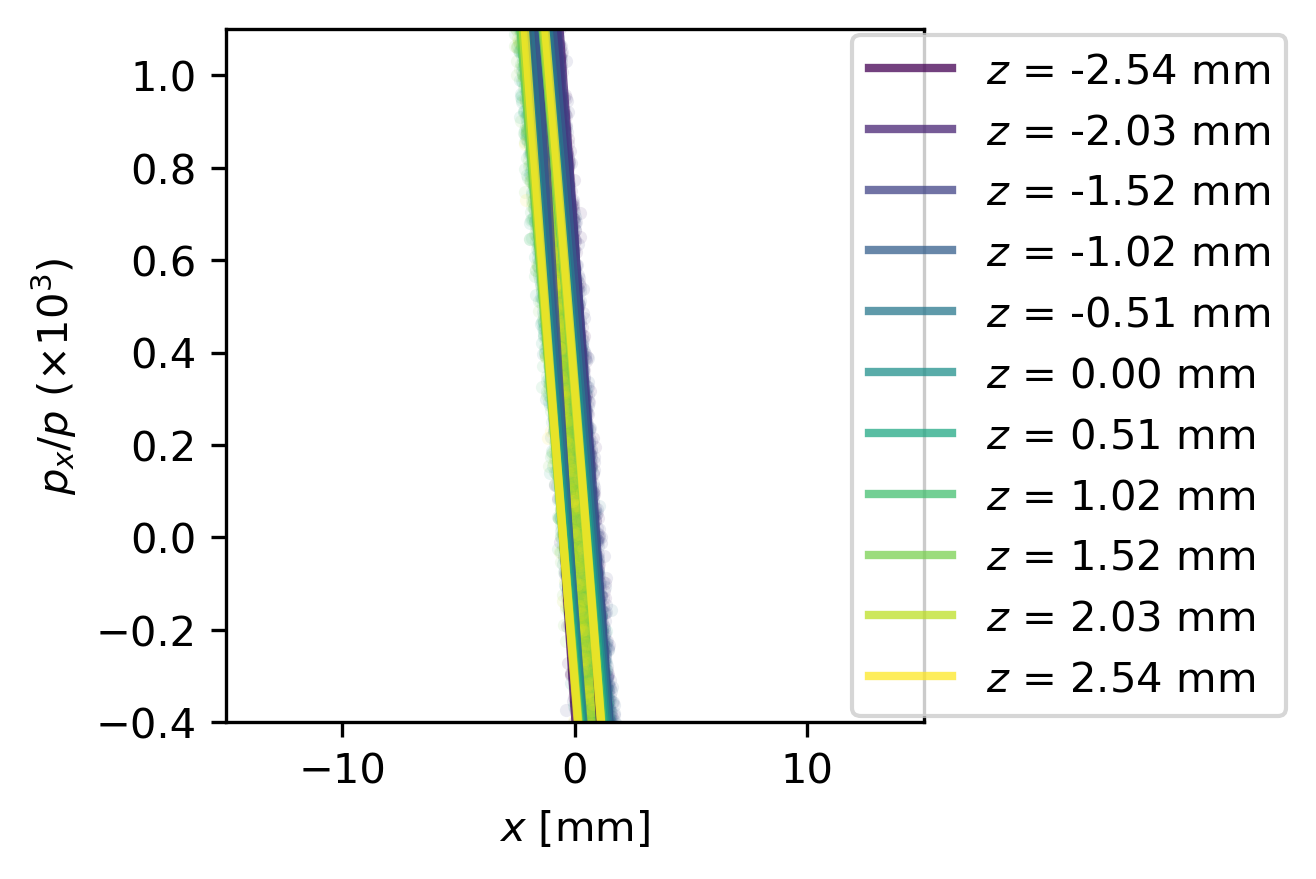

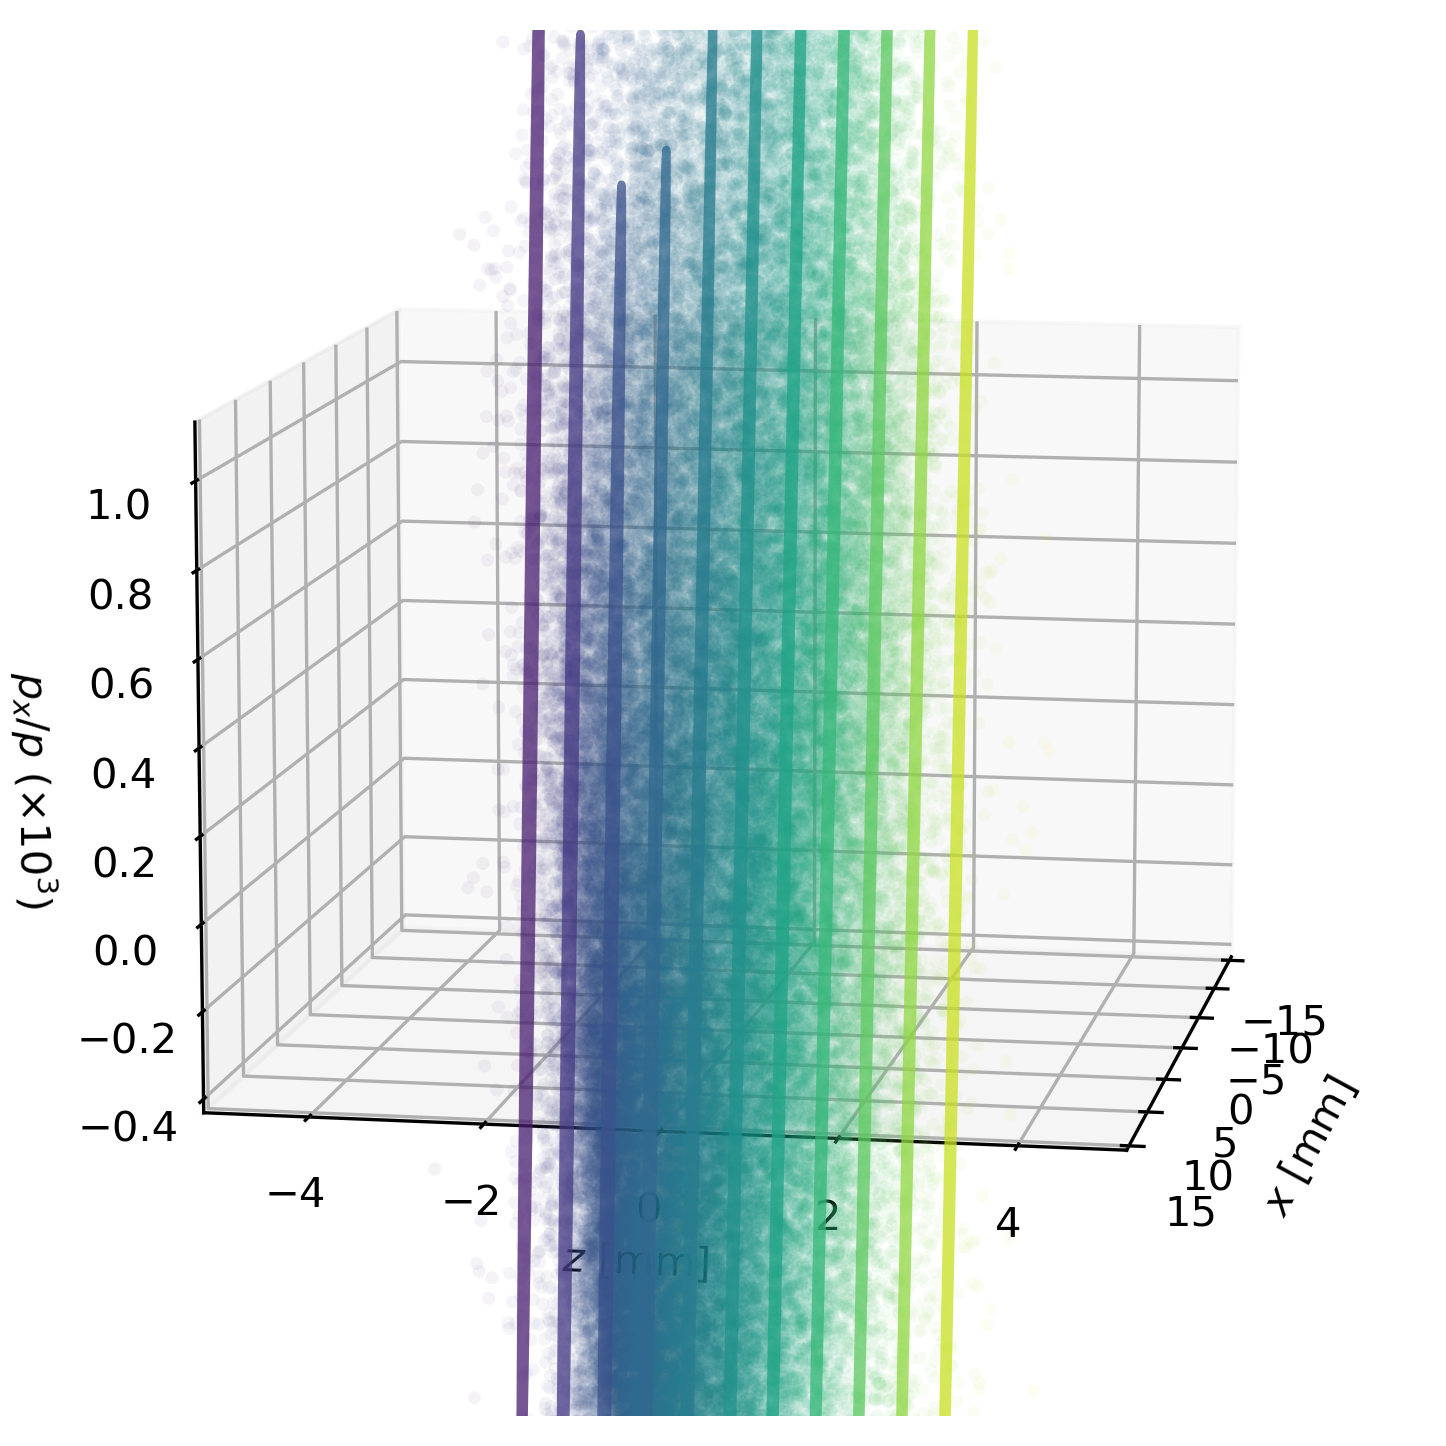

In [28]:
# plot initial beam sliced phase space
fig, ax = plot_sliced_ps_2d(b_out, z_slices, 'z', x_lim=x_lims, px_lim=px_lims)
plt.show()
fig, ax = plot_sliced_ps_3d(b_out, z_slices, 'z', x_lim=x_lims, px_lim=px_lims, z_lim=z_lims)
plt.show()